In [1]:
###########################################################################################
# Code to automate the data extraction and creation of fundamental plots for the FE ASICs #
#                       --> Includes Cryocycles [0,5,20,100]                              #
#                               Author: Steven Doran                                      #
###########################################################################################

import matplotlib.pyplot as plt
import numpy as np

TotalChips = int(34)                             # specify number of chips you are using for data
TotalCryo = int(2); Cryocycles = [5,20] #,100]    # specify cryocyles

T = []
# Need to adjust the numbering of the chips
# We staCT at 20 for this batch
for i in range(TotalChips):
    T.append(i+20)

# Create strings so it can automatically read in txt data
chips = []
for i in range(TotalChips):
    a = 'chip' + str(i+20)
    chips = np.append(chips,a)
data = []; txt = []
for i in range(len(chips)):
    data.append([]); txt.append([])
for i in range(len(chips)):
    for j in Cryocycles:
        e = 'DataCT' + str(j) + str(chips[i])
        data[i] = np.append(data[i],e)
        f = str(chips[i]) + 'CT' + str(j) + '.dat'
        txt[i] = np.append(txt[i],f)   # stores the actual data file's name we wish to extract from

# extract data to RMS,Mean,Gain,Ch,PF arrays
# Data[i][j][k] = RMS[chip#][Cryocycle#][channel#]
RMS = np.zeros((len(chips),len(Cryocycles),16))
Mean = np.zeros((len(chips),len(Cryocycles),16))
Ch = np.zeros((len(chips),len(Cryocycles),16))
PF = np.zeros((len(chips),len(Cryocycles),16))
Gain = np.zeros((len(chips),len(Cryocycles),16))

for j in range(len(chips)):
    for i in range(len(Cryocycles)):
        r = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        rr = r.T[0]
        RMS[j][i] = rr[:]
        m = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        mm = m.T[1]
        Mean[j][i] = mm[:]
        cc = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        ccc = cc.T[2]
        Ch[j][i] = ccc[:]
        p = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        passfail = p.T[3]
        PF[j][i] = passfail[:]
        g = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        gg = g.T[4]
        Gain[j][i] = gg[:]
        
# Normalize the channel Numbers
for i in range(len(chips)):
    for j in range(len(Cryocycles)):
        for k in range(len(Ch[i][j])):
            if 32. > Ch[i][j][k] > 15.:
                Ch[i][j][k] = Ch[i][j][k] - 16.
            if 48. > Ch[i][j][k] > 31.:
                Ch[i][j][k] = Ch[i][j][k] - 32.
            if Ch[i][j][k] > 47.:
                Ch[i][j][k] = Ch[i][j][k] - 48.

# Fill lists of lists based off of Pass-Fail
# passRMS, etc... will be filled with data on passed values; failRMS with failed
passRMS = []; passMean = []; passCh = []; passPF = []; passGain = []
failRMS = []; failMean = []; failCh = []; failPF = []; failGain = []

# create a list of lists - containing each chip as a seperate index
for i in range(len(chips)):
    passRMS.append(([])); passMean.append(([])); passCh.append(([])); passPF.append(([])); passGain.append(([]))
    failRMS.append(([])); failMean.append(([])); failCh.append(([])); failPF.append(([])); failGain.append(([]))
for i in range(len(chips)):
    for j in range(len(Cryocycles)):
        passRMS[i].append(([])); passMean[i].append(([])); 
        passCh[i].append(([])); passPF[i].append(([])); passGain[i].append(([]))
        failRMS[i].append(([])); failMean[i].append(([]));
        failCh[i].append(([])); failPF[i].append(([])); failGain[i].append(([]))
# append data to the associated lists, based off of P/F
for j in range(len(chips)):
    for i in range(len(Cryocycles)):
        for k in range(0,16):
            if PF[j][i][k] == 0.:
                passRMS[j][i].append((RMS[j][i][k])); passMean[j][i].append((Mean[j][i][k]));
                passCh[j][i].append((Ch[j][i][k]))
                passPF[j][i].append((PF[j][i][k])); passGain[j][i].append((Gain[j][i][k])) 
            if PF[j][i][k] == 1.:
                failRMS[j][i].append((RMS[j][i][k])); failMean[j][i].append((Mean[j][i][k]));
                failCh[j][i].append((Ch[j][i][k]))
                failPF[j][i].append((PF[j][i][k])); failGain[j][i].append((Gain[j][i][k]))

print('done')

done


### Histograms

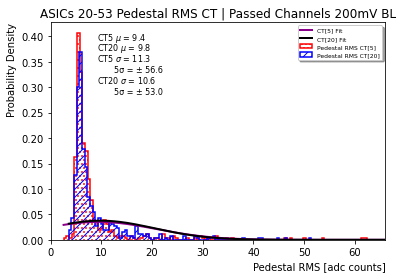

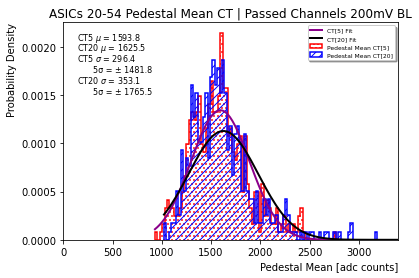

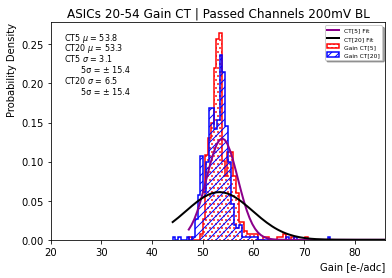

done


In [12]:
#%matplotlib

import matplotlib.pyplot as plt
import numpy as np
from statistics import NormalDist
from scipy.stats import norm

# Histograms - Append data into pass/fail
pR = []; pM = []; pG = []   # Pass RMS, Mean, Gain
fR = []; fM = []; fG = []   # Failed RMS, Mean, Gain

for i in range(len(Cryocycles)):
    pR.append([]); pM.append([]); pG.append([]); fR.append([]); fM.append([]); fG.append([])

# passMean[chip][cryo][data]
    
for i in range(len(passMean)):
    for j in range(len(Cryocycles)):
        for k in range(len(passMean[i][j])):
            pM[j].append(passMean[i][j][k])
for i in range(len(failMean)):
    for j in range(len(Cryocycles)):
        for k in range(len(failMean[i][j])):
            fM[j].append(failMean[i][j][k])
    
for i in range(len(passRMS)):
    for j in range(len(Cryocycles)):
        for k in range(len(passRMS[i][j])):
            pR[j].append(passRMS[i][j][k])
for i in range(len(failRMS)):
    for j in range(len(Cryocycles)):
        for k in range(len(failRMS[i][j])):
            fR[j].append(failRMS[i][j][k])
            
for i in range(len(passGain)):
    for j in range(len(Cryocycles)):
        for k in range(len(passGain[i][j])):
            pG[j].append(passGain[i][j][k])
for i in range(len(failGain)):
    for j in range(len(Cryocycles)):
        for k in range(len(failGain[i][j])):
            fG[j].append(failGain[i][j][k])
            
################### sigma and mean calculations ######################
normGain5 = NormalDist.from_samples(pG[0])
G5_mean = normGain5.mean; G5_std = normGain5.stdev
G5m = 'CT5 ' + r'$\mu$' + ' = ' + str(round(G5_mean,1))
G5s = 'CT5 ' + r'$\sigma$' + ' = ' + str(round(G5_std,1))
normGain20 = NormalDist.from_samples(pG[1])
G20_mean = normGain20.mean; G20_std = normGain20.stdev
G20m = 'CT20 ' + r'$\mu$' + ' = ' + str(round(G20_mean,1))
G20s = 'CT20 ' + r'$\sigma$' + ' = ' + str(round(G20_std,1))

normRMS5 = NormalDist.from_samples(pR[0])
R5_mean = normRMS5.mean; R5_std = normRMS5.stdev
R5m = 'CT5 ' + r'$\mu$' + ' = ' + str(round(R5_mean,1))
R5s = 'CT5 ' + r'$\sigma$' + ' = ' + str(round(R5_std,1))
normRMS20 = NormalDist.from_samples(pR[1])
R20_mean = normRMS20.mean; R20_std = normRMS20.stdev
R20m = 'CT20 ' + r'$\mu$' + ' = ' + str(round(R20_mean,1))
R20s = 'CT20 ' + r'$\sigma$' + ' = ' + str(round(R20_std,1))

normMean5 = NormalDist.from_samples(pM[0])
M5_mean = normMean5.mean; M5_std = normMean5.stdev
M5m = 'CT5 ' + r'$\mu$' + ' = ' + str(round(M5_mean,1))
M5s = 'CT5 ' + r'$\sigma$' + ' = ' + str(round(M5_std,1))
normMean20 = NormalDist.from_samples(pM[1])
M20_mean = normMean20.mean; M20_std = normMean20.stdev
M20m = 'CT20 ' + r'$\mu$' + ' = ' + str(round(M20_mean,1))
M20s = 'CT20 ' + r'$\sigma$' + ' = ' + str(round(M20_std,1))


R5 = pR[0]; M5 = pM[0]; G5 = pG[0]
R20 = pR[1]; M20 = pM[1]; G20 = pG[1]

########################################################################
# Limits
RMSlow = 0.; RMShigh = 66.
Meanlow = 0; Meanhigh = 3400
Gainlow = 20; Gainhigh = 86.

###################################################################################
# RMS
fig, ax = plt.subplots()
ax.set_title('ASICs 20-53 Pedestal RMS CT | Passed Channels 200mV BL')
ax.set_xlabel('Pedestal RMS [adc counts]', loc = 'right')
ax.set_ylabel('Probability Density', loc = 'top')

# Proper Binning
e = max(R5)-min(R5); f = max(R20)-min(R20); ratio = f/e
binsR5 = 200; binsR20 = int(binsR5*ratio)

# CT[5]
mu = R5_mean; sigma = R5_std
count, bins, ignored = ax.hist(R5, binsR5, histtype = 'step',
             hatch = '...', stacked = False, color = 'red', linewidth = 1.5,
             label = 'Pedestal RMS CT[5]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='darkmagenta', label = 'CT[5] Fit')
# CT[20]
mu = R20_mean; sigma = R20_std
count, bins, ignored = ax.hist(R20, binsR20, histtype = 'step',
             hatch = '///', stacked = False, color = 'blue', linewidth = 1.5,
             label = 'Pedestal RMS CT[20]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='black', label = 'CT[20] Fit')
ax.text(.14,0.92,R5m,size = 8,transform = ax.transAxes)
ax.text(.14,0.87,R20m,size = 8,transform = ax.transAxes)
ax.text(.14,0.82,R5s,size = 8,transform = ax.transAxes)
ax.text(.14,0.72,R20s,size = 8,transform = ax.transAxes)

# 5-sigma values
Rsig5_5 = '5σ = ± ' + str(round(5*R5_std,1))   
ax.text(.19,0.77,Rsig5_5,size = 8,transform = ax.transAxes)
Rsig5_20 = '5σ = ± ' + str(round(5*R20_std,1))   
ax.text(.19,0.67,Rsig5_20,size = 8,transform = ax.transAxes)

ax.set_xlim([RMSlow,RMShigh])
plt.legend(shadow=True, loc = 'upper right', prop={'size': 6})
path1 = '../../../../RMS CT.png'
plt.savefig(path1,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()

###################################################################################
# Mean
fig, ax = plt.subplots()
ax.set_title('ASICs 20-54 Pedestal Mean CT | Passed Channels 200mV BL')
ax.set_xlabel('Pedestal Mean [adc counts]', loc = 'right')
ax.set_ylabel('Probability Density', loc = 'top')

# Proper Binning
c = max(M5)-min(M5); d = max(M20)-min(M20); ratio = d/c
binsM5 = 75; binsM20 = int(binsM5*ratio)

# CT[5]
mu = M5_mean; sigma = M5_std
count, bins, ignored = ax.hist(M5, binsM5, histtype = 'step',
             hatch = '...', stacked = False, color = 'red', linewidth = 1.5,
             label = 'Pedestal Mean CT[5]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='darkmagenta', label = 'CT[5] Fit')
# CT[20]
mu = M20_mean; sigma = M20_std
count, bins, ignored = ax.hist(M20, binsM20, histtype = 'step',
             hatch = '///', stacked = False, color = 'blue', linewidth = 1.5,
             label = 'Pedestal Mean CT[20]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='black', label = 'CT[20] Fit')
ax.text(.04,0.92,M5m,size = 8,transform = ax.transAxes)
ax.text(.04,0.87,M20m,size = 8,transform = ax.transAxes)
ax.text(.04,0.82,M5s,size = 8,transform = ax.transAxes)
ax.text(.04,0.72,M20s,size = 8,transform = ax.transAxes)

# 5-sigma values
Msig5_5 = '5σ = ± ' + str(round(5*M5_std,1))   
ax.text(.09,0.77,Msig5_5,size = 8,transform = ax.transAxes)
Msig5_20 = '5σ = ± ' + str(round(5*M20_std,1))   
ax.text(.09,0.67,Msig5_20,size = 8,transform = ax.transAxes)
ax.set_xlim([Meanlow,Meanhigh])
plt.legend(shadow=True, loc = 'upper right', prop={'size': 6})
path2 = '../../../../Mean CT.png'
plt.savefig(path2,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()
###################################################################################

# Gain
fig, ax = plt.subplots()
ax.set_title('ASICs 20-54 Gain CT | Passed Channels 200mV BL')
ax.set_xlabel('Gain [e-/adc]', loc = 'right')
ax.set_ylabel('Probability Density', loc = 'top')

# Proper Binning
g = max(G5)-min(G5); h = max(G20)-min(G20); ratio = h/g
binsG5 = 85; binsG20 = int(binsG5*ratio)


# CT[5]
mu = G5_mean; sigma = G5_std
count, bins, ignored = ax.hist(G5, binsG5, histtype = 'step',
             hatch = '...', stacked = False, color = 'red', linewidth = 1.5,
             label = 'Gain CT[5]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='darkmagenta', label = 'CT[5] Fit')
# CT[20]
mu = G20_mean; sigma = G20_std
count, bins, ignored = ax.hist(G20, binsG20, histtype = 'step',
             hatch = '///', stacked = False, color = 'blue', linewidth = 1.5,
             label = 'Gain CT[20]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='black', label = 'CT[20] Fit')
ax.text(.04,0.92,G5m,size = 8,transform = ax.transAxes)
ax.text(.04,0.87,G20m,size = 8,transform = ax.transAxes)
ax.text(.04,0.82,G5s,size = 8,transform = ax.transAxes)
ax.text(.04,0.72,G20s,size = 8,transform = ax.transAxes)

# 5-sigma values
Gsig5_5 = '5σ = ± ' + str(round(5*G5_std,1))   
ax.text(.09,0.77,Gsig5_5,size = 8,transform = ax.transAxes)
Gsig5_20 = '5σ = ± ' + str(round(5*G5_std,1))   
ax.text(.09,0.67,Gsig5_20,size = 8,transform = ax.transAxes)
ax.set_xlim([Gainlow,Gainhigh])
plt.legend(shadow=True, loc = 'upper right', prop={'size': 6})
path3 = '../../../../Gain CT.png'
plt.savefig(path3,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()

print('done')

#savefig()

In [5]:
###### Determining 3-sigma and 5-sigma for the distributions
# You can apply these cuts above to soCTing out the problematic chips

# CT5
# RMS
print('CT5')
print('RMS', '\nμ =', round(R5_mean,2), '| σ =', round(R5_std,2))
print('3σ =', '±', round(3*R5_std,2), '| 5σ =', '±', round(5*R5_std,2))
print('X-lim 3σ range = [0,', R5_mean + round(3*R5_std,2), ']')
print('X-lim 5σ range = [0,', R5_mean + round(5*R5_std,2), ']')
print('Note -> RMS 3 sigma and 5 sigma values fall below 0')


# Mean
print('Mean', '\nμ =', round(M5_mean,2), '| σ =', round(M5_std,2))
print('3σ =', '±', round(3*M5_std,2), '| 5σ =', '±', round(5*M5_std,2))
print('X-lim 3σ range = [', M5_mean - round(3*M5_std,2), ',', M5_mean + round(3*M5_std,2), ']')
print('X-lim 5σ range = [', M5_mean - round(5*M5_std,2), ',', M5_mean + round(5*M5_std,2), ']')
print('\n')

# Gain
print('Gain', '\nμ =', round(G5_mean,2), '| σ =', round(G5_std,2))
print('3σ =', '±', round(3*G5_std,2), '| 5σ =', '±', round(5*G5_std,2))
print('X-lim 3σ range = [', G5_mean - round(3*G5_std,2), ',', G5_mean + round(3*G5_std,2), ']')
print('X-lim 5σ range = [', G5_mean - round(5*G5_std,2), ',', G5_mean + round(5*G5_std,2), ']')
print('###########################################################')
# CT20
# RMS
print('\nCT20')
print('RMS', '\nμ =', round(R20_mean,2), '| σ =', round(R20_std,2))
print('3σ =', '±', round(3*R20_std,2), '| 5σ =', '±', round(5*R20_std,2))
print('X-lim 3σ range = [0,', R20_mean + round(3*R20_std,2), ']')
print('X-lim 5σ range = [0,', R20_mean + round(5*R20_std,2), ']')
print('Note -> RMS 3 sigma and 5 sigma values fall below 0')
print('\n')

# Mean
print('Mean', '\nμ =', round(M20_mean,2), '| σ =', round(M20_std,2))
print('3σ =', '±', round(3*M20_std,2), '| 5σ =', '±', round(5*M20_std,2))
print('X-lim 3σ range = [', M20_mean - round(3*M20_std,2), ',', M20_mean + round(3*M20_std,2), ']')
print('X-lim 5σ range = [', M20_mean - round(5*M20_std,2), ',', M20_mean + round(5*M20_std,2), ']')
print('\n')

# Gain
print('Gain', '\nμ =', round(G20_mean,2), '| σ =', round(G20_std,2))
print('3σ =', '±', round(3*G20_std,2), '| 5σ =', '±', round(5*G20_std,2))
print('X-lim 3σ range = [', G20_mean - round(3*G20_std,2), ',', G20_mean + round(3*G20_std,2), ']')
print('X-lim 5σ range = [', G20_mean - round(5*G20_std,2), ',', G20_mean + round(5*G20_std,2), ']')

CT5
RMS 
μ = 9.42 | σ = 11.32
3σ = ± 33.97 | 5σ = ± 56.62
X-lim 3σ range = [0, 43.38899467479675 ]
X-lim 5σ range = [0, 66.03899467479674 ]
Note -> RMS 3 sigma and 5 sigma values fall below 0
Mean 
μ = 1593.78 | σ = 296.36
3σ = ± 889.08 | 5σ = ± 1481.8
X-lim 3σ range = [ 704.7005447154471 , 2482.8605447154473 ]
X-lim 5σ range = [ 111.9805447154472 , 3075.580544715447 ]


Gain 
μ = 53.83 | σ = 3.08
3σ = ± 9.24 | 5σ = ± 15.4
X-lim 3σ range = [ 44.58965447154471 , 63.069654471544716 ]
X-lim 5σ range = [ 38.429654471544715 , 69.22965447154472 ]
###########################################################

CT20
RMS 
μ = 9.82 | σ = 10.6
3σ = ± 31.79 | 5σ = ± 52.98
X-lim 3σ range = [0, 41.60547054166666 ]
X-lim 5σ range = [0, 62.79547054166666 ]
Note -> RMS 3 sigma and 5 sigma values fall below 0


Mean 
μ = 1625.53 | σ = 353.1
3σ = ± 1059.31 | 5σ = ± 1765.52
X-lim 3σ range = [ 566.2203541666665 , 2684.8403541666667 ]
X-lim 5σ range = [ -139.9896458333335 , 3391.0503541666667 ]


Gain 
μ = 53.